In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('overlap.xlsx', header = 1)
df.head()

,Gene Name,GeneSymbol_mRNA,log2FC,Unnamed: 3,GeneSymbol_protein,Description,Abundance Ratio (log2): (HAP2) / (LAP2),Unnamed: 7
0,abhydrolase domain containing 17C,Abhd17c,-0.171921,NaN,Map1b,Microtubule-associated protein 1B OS=Mus muscu...,0.22,5730455P16Rik
1,protocadherin alpha 9,Pcdha9,-0.535941,NaN,Gng5,Guanine nucleotide-binding protein G(I)/G(S)/G...,0.39,Ablim1
2,receptor accessory protein 6,Reep6,0.323865,NaN,Cst3,Cystatin (Fragment) OS=Mus musculus GN=Cst3 PE...,-0.34,Ace
3,interferon regulatory factor 2,Irf2,0.299791,NaN,Nipsnap1,Protein NipSnap homolog 1 OS=Mus musculus GN=N...,0.10,Adcy5
4,arylsulfatase K,Arsk,0.242565,NaN,Gsr,"Glutathione reductase, mitochondrial OS=Mus mu...",-0.12,Add2


In [3]:
df.columns

Index(['Gene Name', 'GeneSymbol_mRNA', 'log2FC', 'Unnamed: 3',
       'GeneSymbol_protein', 'Description',
       'Abundance Ratio (log2): (HAP2) / (LAP2)', 'Unnamed: 7'],
      dtype='object')

In [4]:
df['mRNA'] = df['GeneSymbol_mRNA']
df['protein'] = df['GeneSymbol_protein']
df['phospho'] = df['Unnamed: 7']

In [5]:
df['mRNA'].dropna().value_counts()

Sfxn1       2
Tbcb        1
Cyb5b       1
Irx1        1
Hnrnpul1    1
           ..
Socs2       1
Twf2        1
Slc39a3     1
Itfg2       1
Traf3ip1    1
Name: mRNA, Length: 2107, dtype: int64

In [6]:
df['protein'].dropna().value_counts()

Serinc5    1
Lsm14a     1
Dctn4      1
Calb1      1
Pcbp2      1
          ..
Anln       1
Cdh13      1
Pdia6      1
Map2k4     1
Acad8      1
Name: protein, Length: 390, dtype: int64

In [7]:
df['phospho'].dropna().value_counts()

Scn2a       1
Asap1       1
Marcks      1
Ppp4r4      1
Zranb2      1
           ..
Arhgap21    1
Pcdh1       1
Spred1      1
Clmn        1
Kif1b       1
Name: phospho, Length: 335, dtype: int64

In [8]:
from matplotlib_venn import venn2, venn3
from matplotlib import pyplot as plt
%matplotlib inline

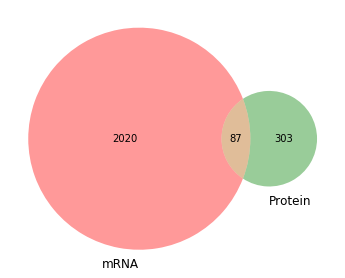

In [9]:
overlap = venn2([set(df['mRNA'].dropna()), set(df['protein'].dropna())],
                set_labels = ('mRNA', 'Protein'),
                set_colors=('red', 'green'))
plt.tight_layout()
plt.savefig('overlap.png', dpi=600)

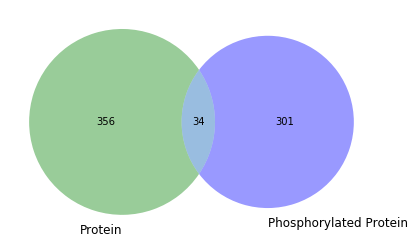

In [10]:
phospho_overlap = venn2([set(df['protein'].dropna()), set(df['phospho'].dropna())],
                set_labels = ('Protein', 'Phosphorylated Protein'),
                set_colors=('green', 'blue'))
plt.tight_layout()
plt.savefig('phospho_overlap.png', dpi=600)

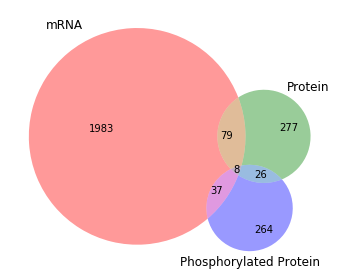

In [11]:
triple = venn3([set(df['mRNA'].dropna()), set(df['protein'].dropna()), set(df['phospho'].dropna())],
            set_labels = ('mRNA', 'Protein', 'Phosphorylated Protein'))
plt.tight_layout()
plt.savefig('triple.png', dpi=600)

In [12]:
intersect = set(df['mRNA'].dropna()) & set(df['protein'].dropna()) & set(df['phospho'].dropna())
intersect

{'Cacnb2', 'Cadm1', 'Ccm2', 'Cdh10', 'Coro1a', 'Map1a', 'Map1b', 'Sirpa'}

In [13]:
reactome = pd.read_excel('GO and Pathway Overlap for Venn Diagram.xlsx', sheet_name='Reactome')
KEGG = pd.read_excel('GO and Pathway Overlap for Venn Diagram.xlsx', sheet_name='KEGG')
BP = pd.read_excel('GO and Pathway Overlap for Venn Diagram.xlsx', sheet_name='BP')
CC = pd.read_excel('GO and Pathway Overlap for Venn Diagram.xlsx', sheet_name='CC')
MF = pd.read_excel('GO and Pathway Overlap for Venn Diagram.xlsx', sheet_name='MF')

/Users/dlh/anaconda3/envs/deeplearning/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:53: UserWarning: Circle A has zero area
  warnings.warn("Circle A has zero area")


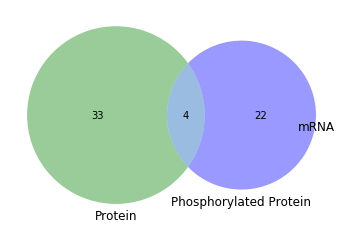

In [14]:
reactome.columns
venn3([set(reactome['mRNA'].dropna()), set(reactome['proteomic '].dropna()), set(reactome['Phospho'].dropna())],
            set_labels = ('mRNA', 'Protein', 'Phosphorylated Protein'))

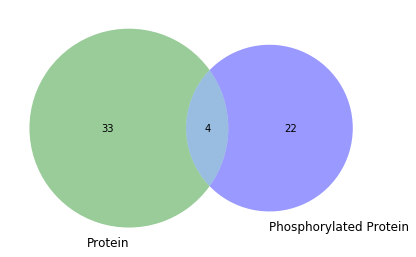

In [15]:
reactome_overlap = venn2([set(reactome['proteomic '].dropna()), set(reactome['Phospho'].dropna())],
                set_labels = ('Protein', 'Phosphorylated Protein'),
                set_colors=('green', 'blue'))
plt.tight_layout()
plt.savefig('reactome_overlap.png', dpi=600)

In [16]:
set(reactome['proteomic '].dropna()) & set(reactome['Phospho'].dropna())

{'MMU-112315', 'MMU-199991', 'MMU-422475', 'MMU-442742'}

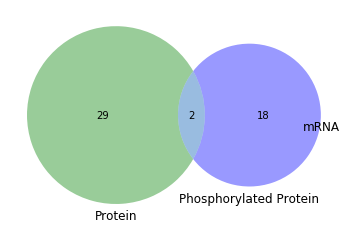

In [17]:
KEGG.columns
venn3([set(KEGG['mRNA'].dropna()), set(KEGG['proteomic'].dropna()), set(KEGG['phospho'].dropna())],
            set_labels = ('mRNA', 'Protein', 'Phosphorylated Protein'))

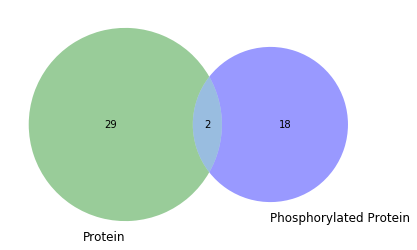

In [18]:
KEGG_overlap = venn2([set(KEGG['proteomic'].dropna()), set(KEGG['phospho'].dropna())],
                set_labels = ('Protein', 'Phosphorylated Protein'),
                set_colors=('green', 'blue'))
plt.tight_layout()
plt.savefig('KEGG_overlap.png', dpi=600)

In [19]:
set(KEGG['proteomic'].dropna()) & set(KEGG['phospho'].dropna())

{'mmu04261', 'mmu04921'}

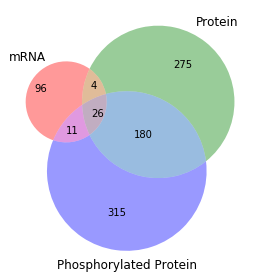

In [20]:
BP.columns
BP_overlay = venn3([set(BP['mRNA'].dropna()), set(BP['proteomic '].dropna()), set(BP['phsopho'].dropna())],
            set_labels = ('mRNA', 'Protein', 'Phosphorylated Protein'))
plt.tight_layout()
plt.savefig('BP_overlap.png', dpi=600)

In [21]:
set(BP['mRNA'].dropna()) & set(BP['proteomic '].dropna()) & set(BP['phsopho'].dropna())

{'GO:0003012',
 'GO:0006936',
 'GO:0007154',
 'GO:0007155',
 'GO:0007275',
 'GO:0009967',
 'GO:0009987',
 'GO:0010033',
 'GO:0010646',
 'GO:0010647',
 'GO:0022603',
 'GO:0023051',
 'GO:0023052',
 'GO:0032501',
 'GO:0032502',
 'GO:0042221',
 'GO:0048518',
 'GO:0048519',
 'GO:0048523',
 'GO:0048731',
 'GO:0048856',
 'GO:0050789',
 'GO:0050794',
 'GO:0050896',
 'GO:0051716',
 'GO:0065007'}

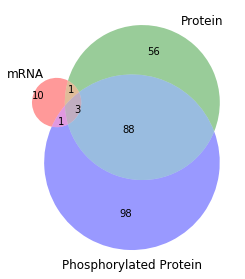

In [22]:
CC.columns
CC_overlay = venn3([set(CC['mRNA'].dropna()), set(CC['proteomic '].dropna()), set(CC['Phospho'].dropna())],
           set_labels = ('mRNA', 'Protein', 'Phosphorylated Protein'))
plt.tight_layout()
plt.savefig('CC_overlap.png', dpi=600)

In [23]:
set(CC['mRNA'].dropna()) & set(CC['proteomic '].dropna()) & set(CC['Phospho'].dropna())

{'GO:0005886', 'GO:0044459', 'GO:0071944'}

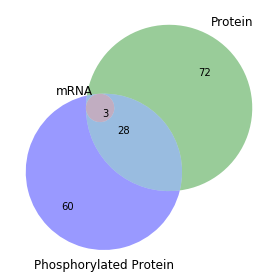

In [24]:
MF.columns
MF_overlay = venn3([set(MF['mRNA'].dropna()), set(MF['proteomic '].dropna()), set(MF['phospho'].dropna())],
           set_labels = ('mRNA', 'Protein', 'Phosphorylated Protein'))
plt.tight_layout()
plt.savefig('MF_overlap.png', dpi=600)

In [25]:
set(MF['mRNA'].dropna()) & set(MF['proteomic '].dropna()) & set(MF['phospho'].dropna())

{'GO:0005488', 'GO:0005515', 'GO:0042802'}